In [94]:
import sys 
sys.path.insert(-1,"../")
from mazeAgentUtils import *

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

#Default parameters for MazeAgent 
params = { 

          #Maze params 
          'mazeType'            : 'loop',                #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold',   #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,                     #maze size scaling parameter, metres
          'dt'                  : 0.005,                 #simulation time disretisation 
          'centres'             : centres,               #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,                     #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,                 #whether doors are opened or closed in multicompartment maze
          'learnAllMatrices'    : True,                  #if True learns [STDP,TD] x [theta, noTheta] = all four. Other wise just STDPtheta and TDnoTheta 
          
          'kappa'               : 1,
          'tau'                 : 4,
          'tau_STDP'            : 30e-3,
          'postpreAsymmetry'    : 0.95,
          'precessFraction'     : 0.7,   
          }


agent =  MazeAgent(params)



Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/210929/openloop_1308'

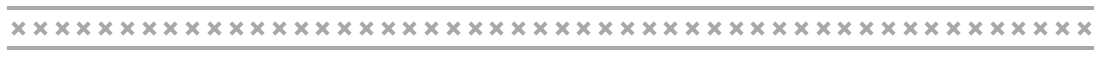

In [100]:
#FIGURE 2A
plotter = Visualiser(agent)
fig, ax = plotter.plotFeatureCells(centresOnly=True, textlabel=False,onepink=True)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2A.svg")


  0%|          | 0/60000 [00:00<?, ?it/s]

Calculating place and grid cells


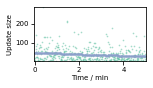

In [101]:
agent.runRat(trainTime=5,saveEvery=0.1)
plotter = Visualiser(agent)

theta: (0.2714603873383104, -6.774961978823512, 0.800075934462496, 0.8789828841203596)
no theta: (0.939859807914792, -3.616596565471725, 0.5610384604633576, 0.5219201553642215)


'../figures/210929/Mav_1309'

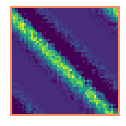

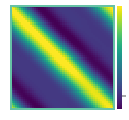

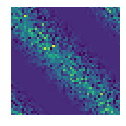

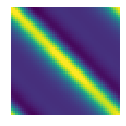

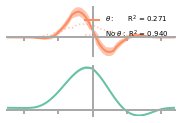

In [102]:
#FIGURE 2B
fig, ax = plotter.plotM(whichM='W',colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2B.svg')

#FIGURE 2C
fig, ax, cb, cax = plotter.plotM(whichM='M')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2C.svg')


fig, ax = plotter.plotM(whichM='W_notheta',colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color(None)
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_notheta')

fig, ax = plotter.plotM(whichM='M_theta',colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color(None)
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M_theta')

#FIGURE 2DE
fig, ax, comparison = plotter.plotMAveraged()
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2DE.svg')


In [103]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

# centres = np.array([[2.5,0.1],[2.6,0.1]])

#Default parameters for MazeAgent 
params2 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.002,       #simulation time disretisation 
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : True,       #whether doors are opened or closed in multicompartment maze

}


agent2 =  MazeAgent(params2)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/210827/openloop_1204'

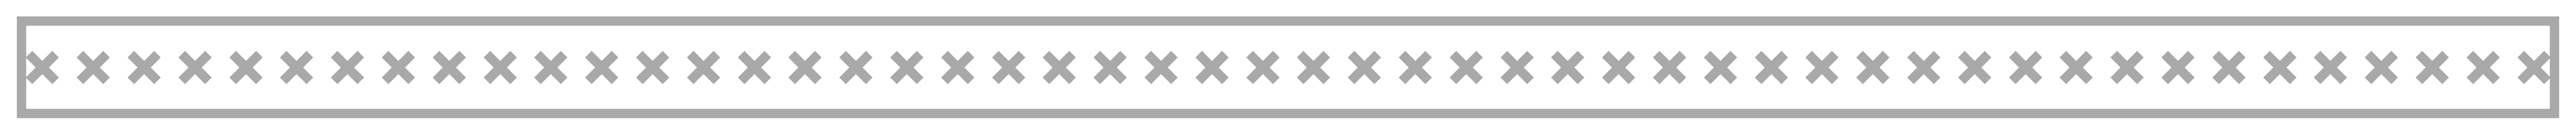

In [ ]:
#FIGURE 2F
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotFeatureCells(centresOnly=True, textlabel=False,onepink=False)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2F.svg")


  0%|          | 0/300000 [00:00<?, ?it/s]

Calculating place and grid cells
using default threshold


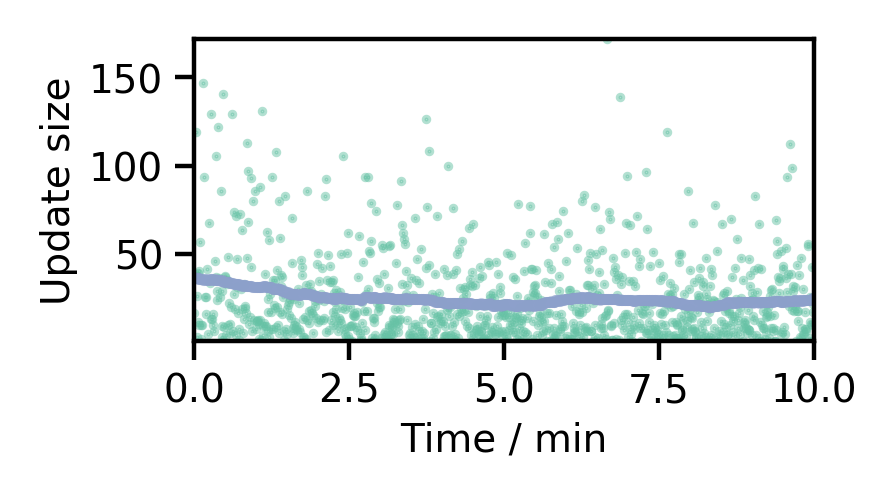

In [ ]:
agent2.runRat(trainTime=10,saveEvery=0.1)
plotter2 = Visualiser(agent2)

'../figures/210827/Mav_1207'

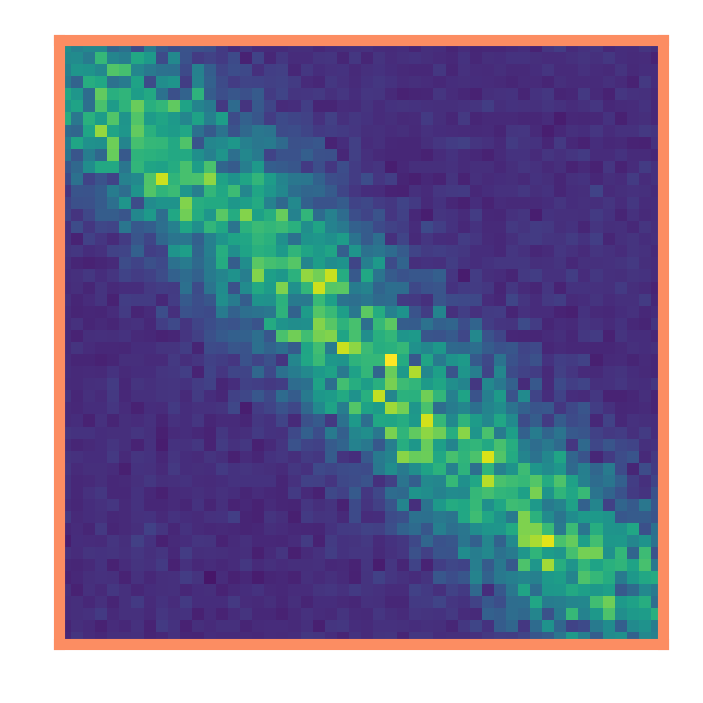

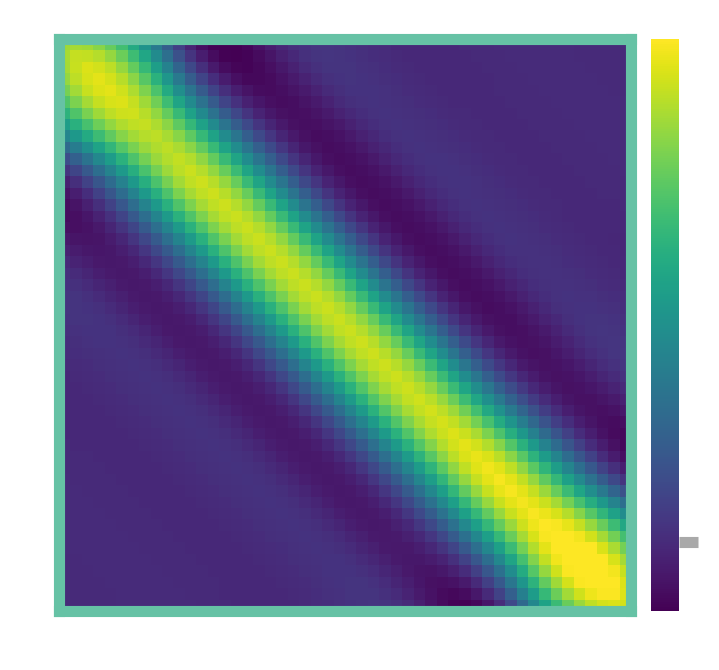

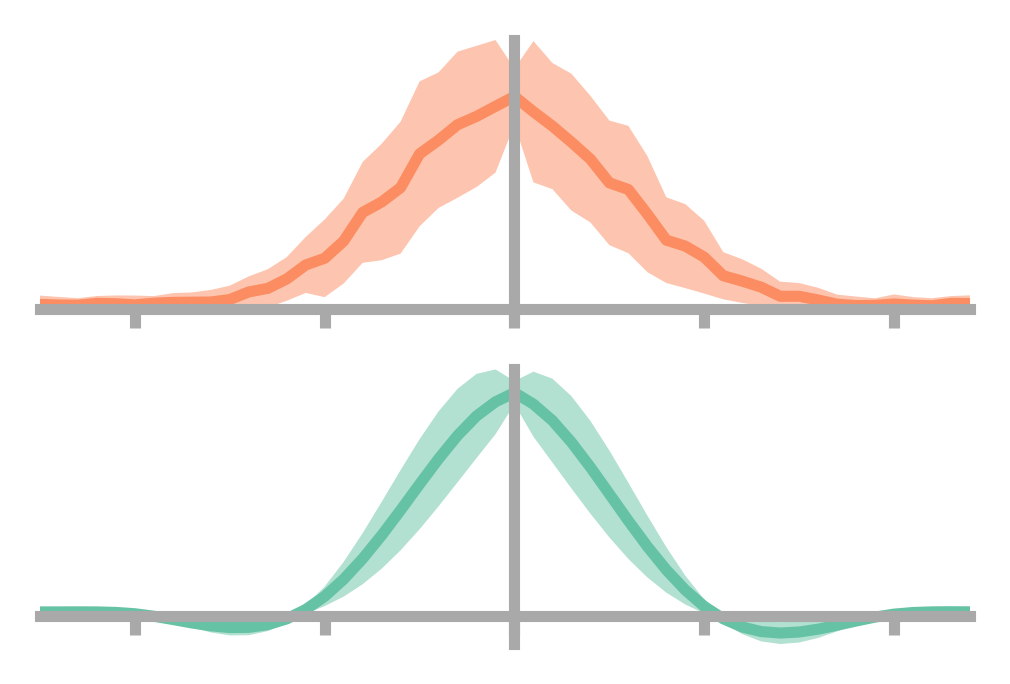

In [ ]:
#FIGURE 2G
fig, ax = plotter2.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2G.svg')

#FIGURE 2H
fig, ax, cb, cax = plotter2.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2H.svg')


#FIGURE 2IJ
fig, ax = plotter2.plotMAveraged()
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2IJ.svg')

In [52]:
#Default parameters for MazeAgent 
N = 200 
roomSize = 2.5
n = int(np.sqrt(N / 2))
delta = roomSize / n
x = np.arange(0,2.5,delta) + delta/2
y = np.arange(0,2.5,delta) + delta/2
xy = np.meshgrid(x,y)
centresL = []
for i in range(len(x)):
    for j in range(len(y)):
        centresL += [[x[i],y[j]]]
centresL = np.array(centresL)
centresR = centresL + np.array([2.5,0])
centres = np.vstack([centresL,centresR])
delta=0.45*delta
centres += np.random.uniform(-0.8*delta,0.8*delta,size=centres.shape)

params3 = { 

          #Maze params 
          'mazeType'            : 'twoRooms',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : roomSize,          #maze size scaling parameter, metres
          'dt'                  : 0.002,       #simulation time disretisation 
          'dx'                  : 0.5,
          'centres'             : centres,
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'rotSpeedScale'       : 9,
          'firingRateLookUp'    : True,
          'biasDoorCross'       : True, 

          #TD params 
          'tau'                 : 2,          #TD decay time, seconds
          'TDdx'                : 0.02,       #rough distance between TD learning updates, metres 

          #STDP params
          'weightDecayTime'     : 10000,         #STDP weight decay time in seconds 
}

agent3 =  MazeAgent(params3)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/50 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/210927/twoRoom_1355'

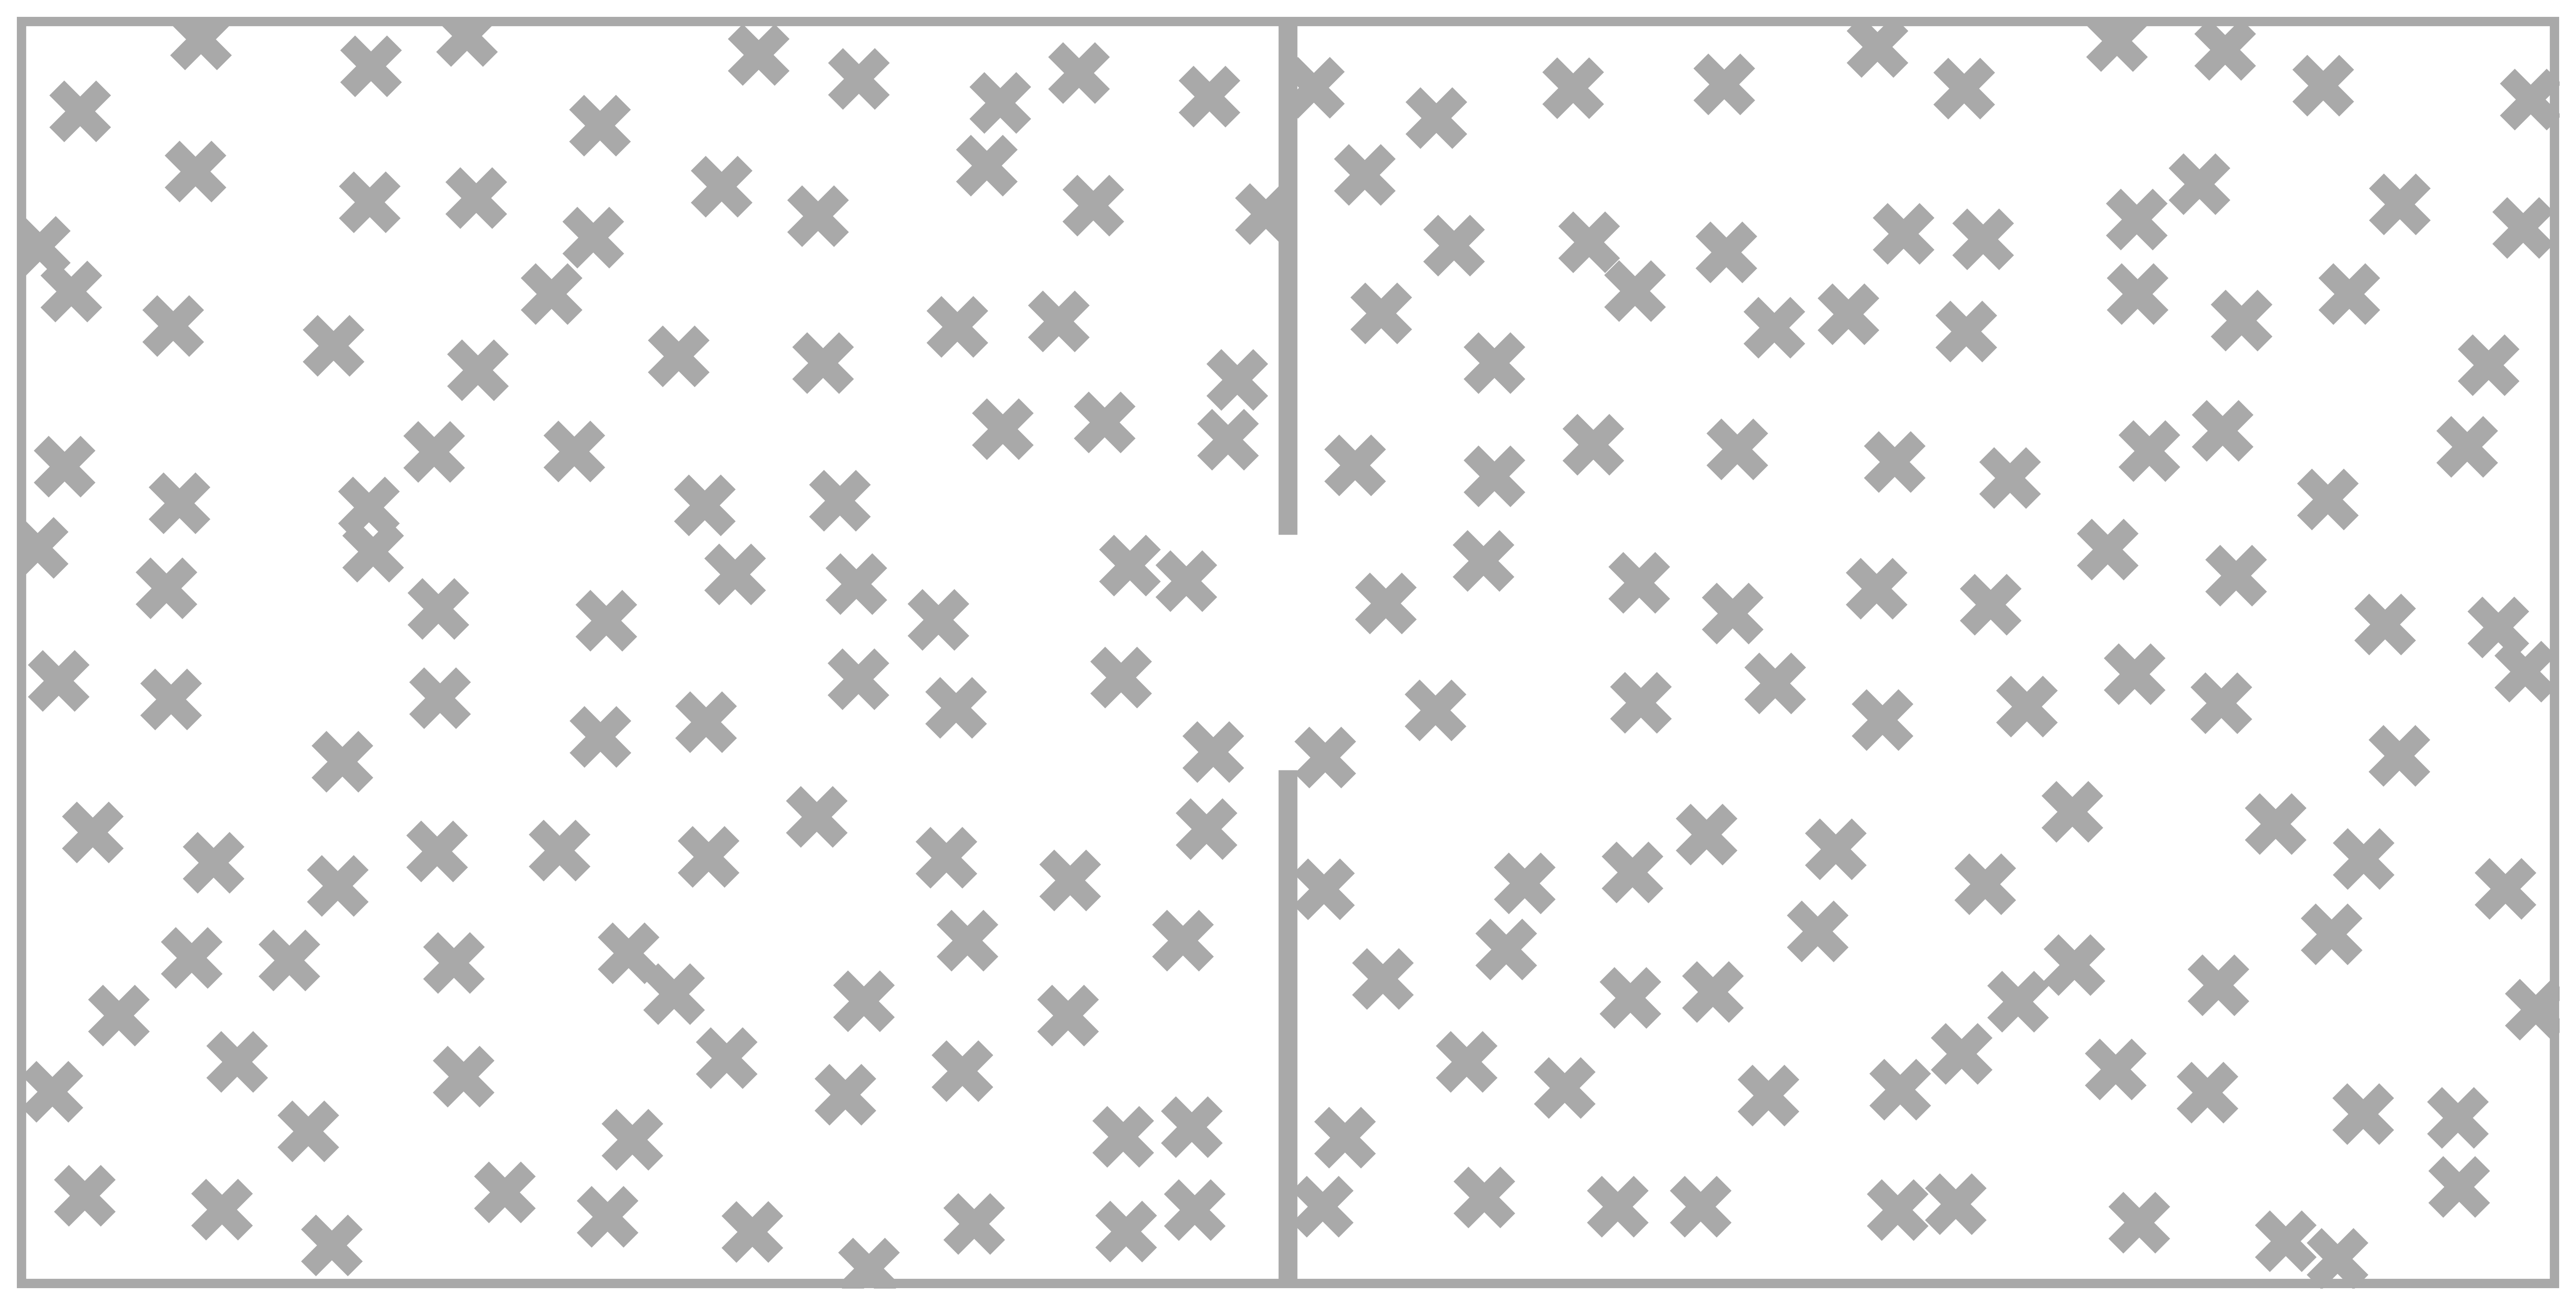

In [44]:
#FIGURE 2K
plotter3 = Visualiser(agent3)
fig, ax = plotter3.plotFeatureCells(centresOnly=True, textlabel=False)
saveFigure(fig, 'twoRoom',specialLocation="../figures/paperFigures/figure2/2K.svg")

# plotter3.plotReceptiveField(number=64)
# plotter3.plotReceptiveField(number=60)
# plotter3.plotReceptiveField(number=54)
# plotter3.plotReceptiveField(number=20)

(<Figure size 8000x4000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb68944dba8>)

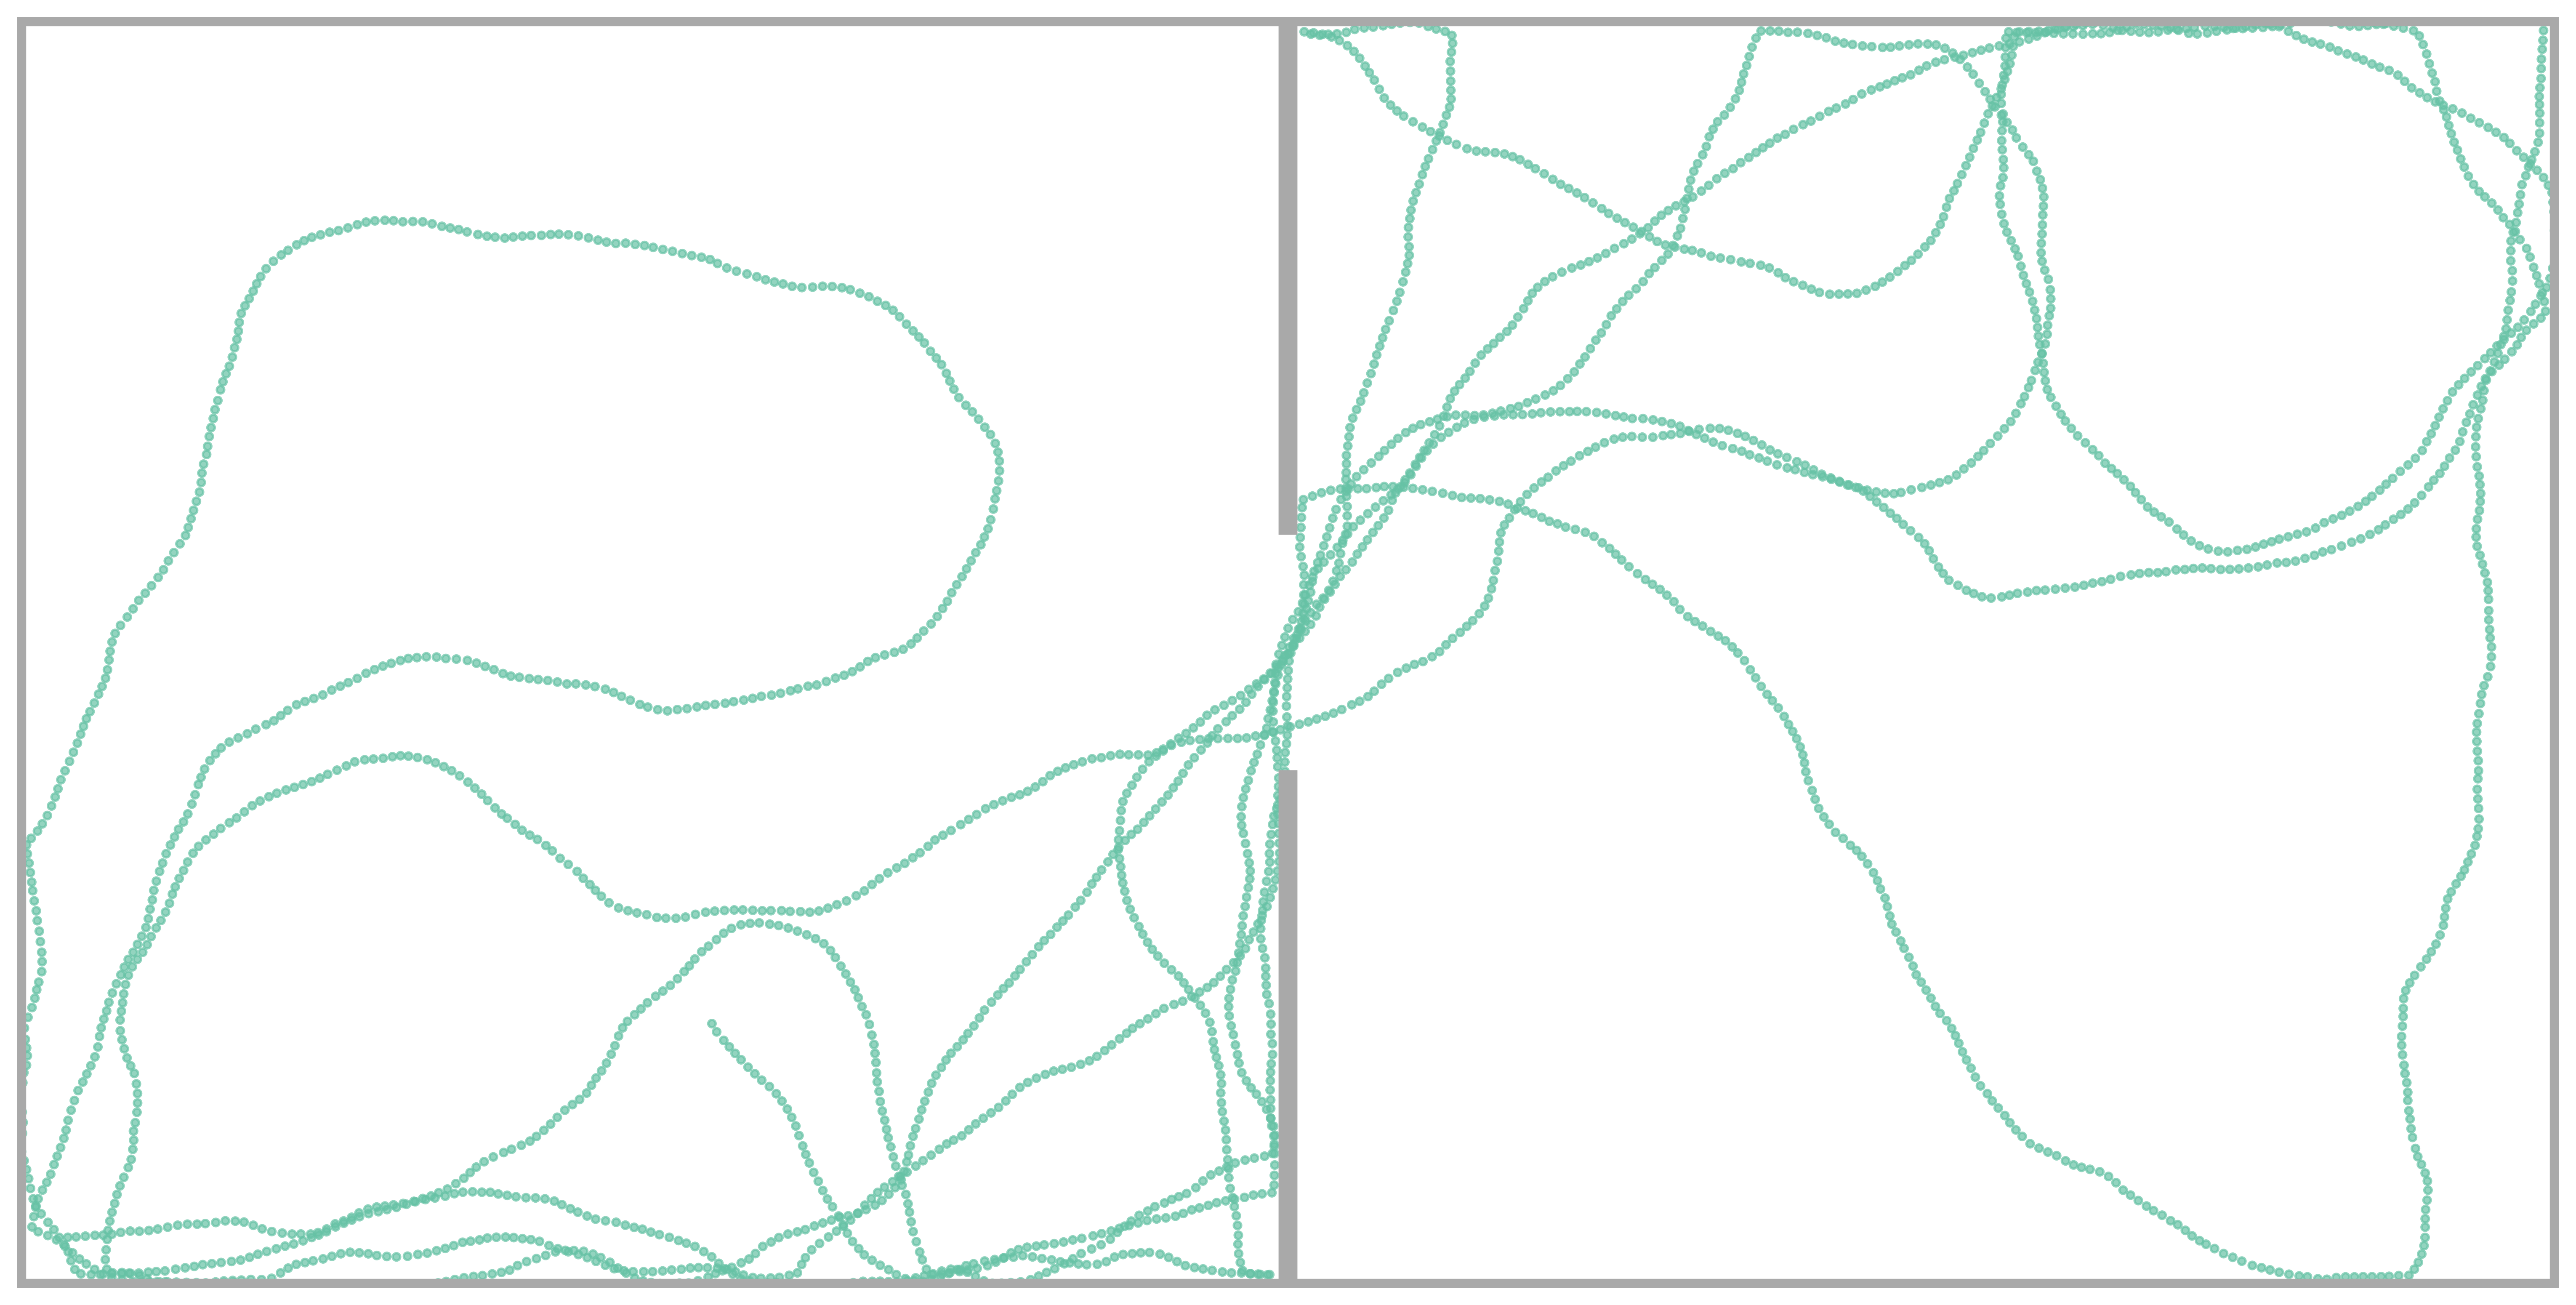

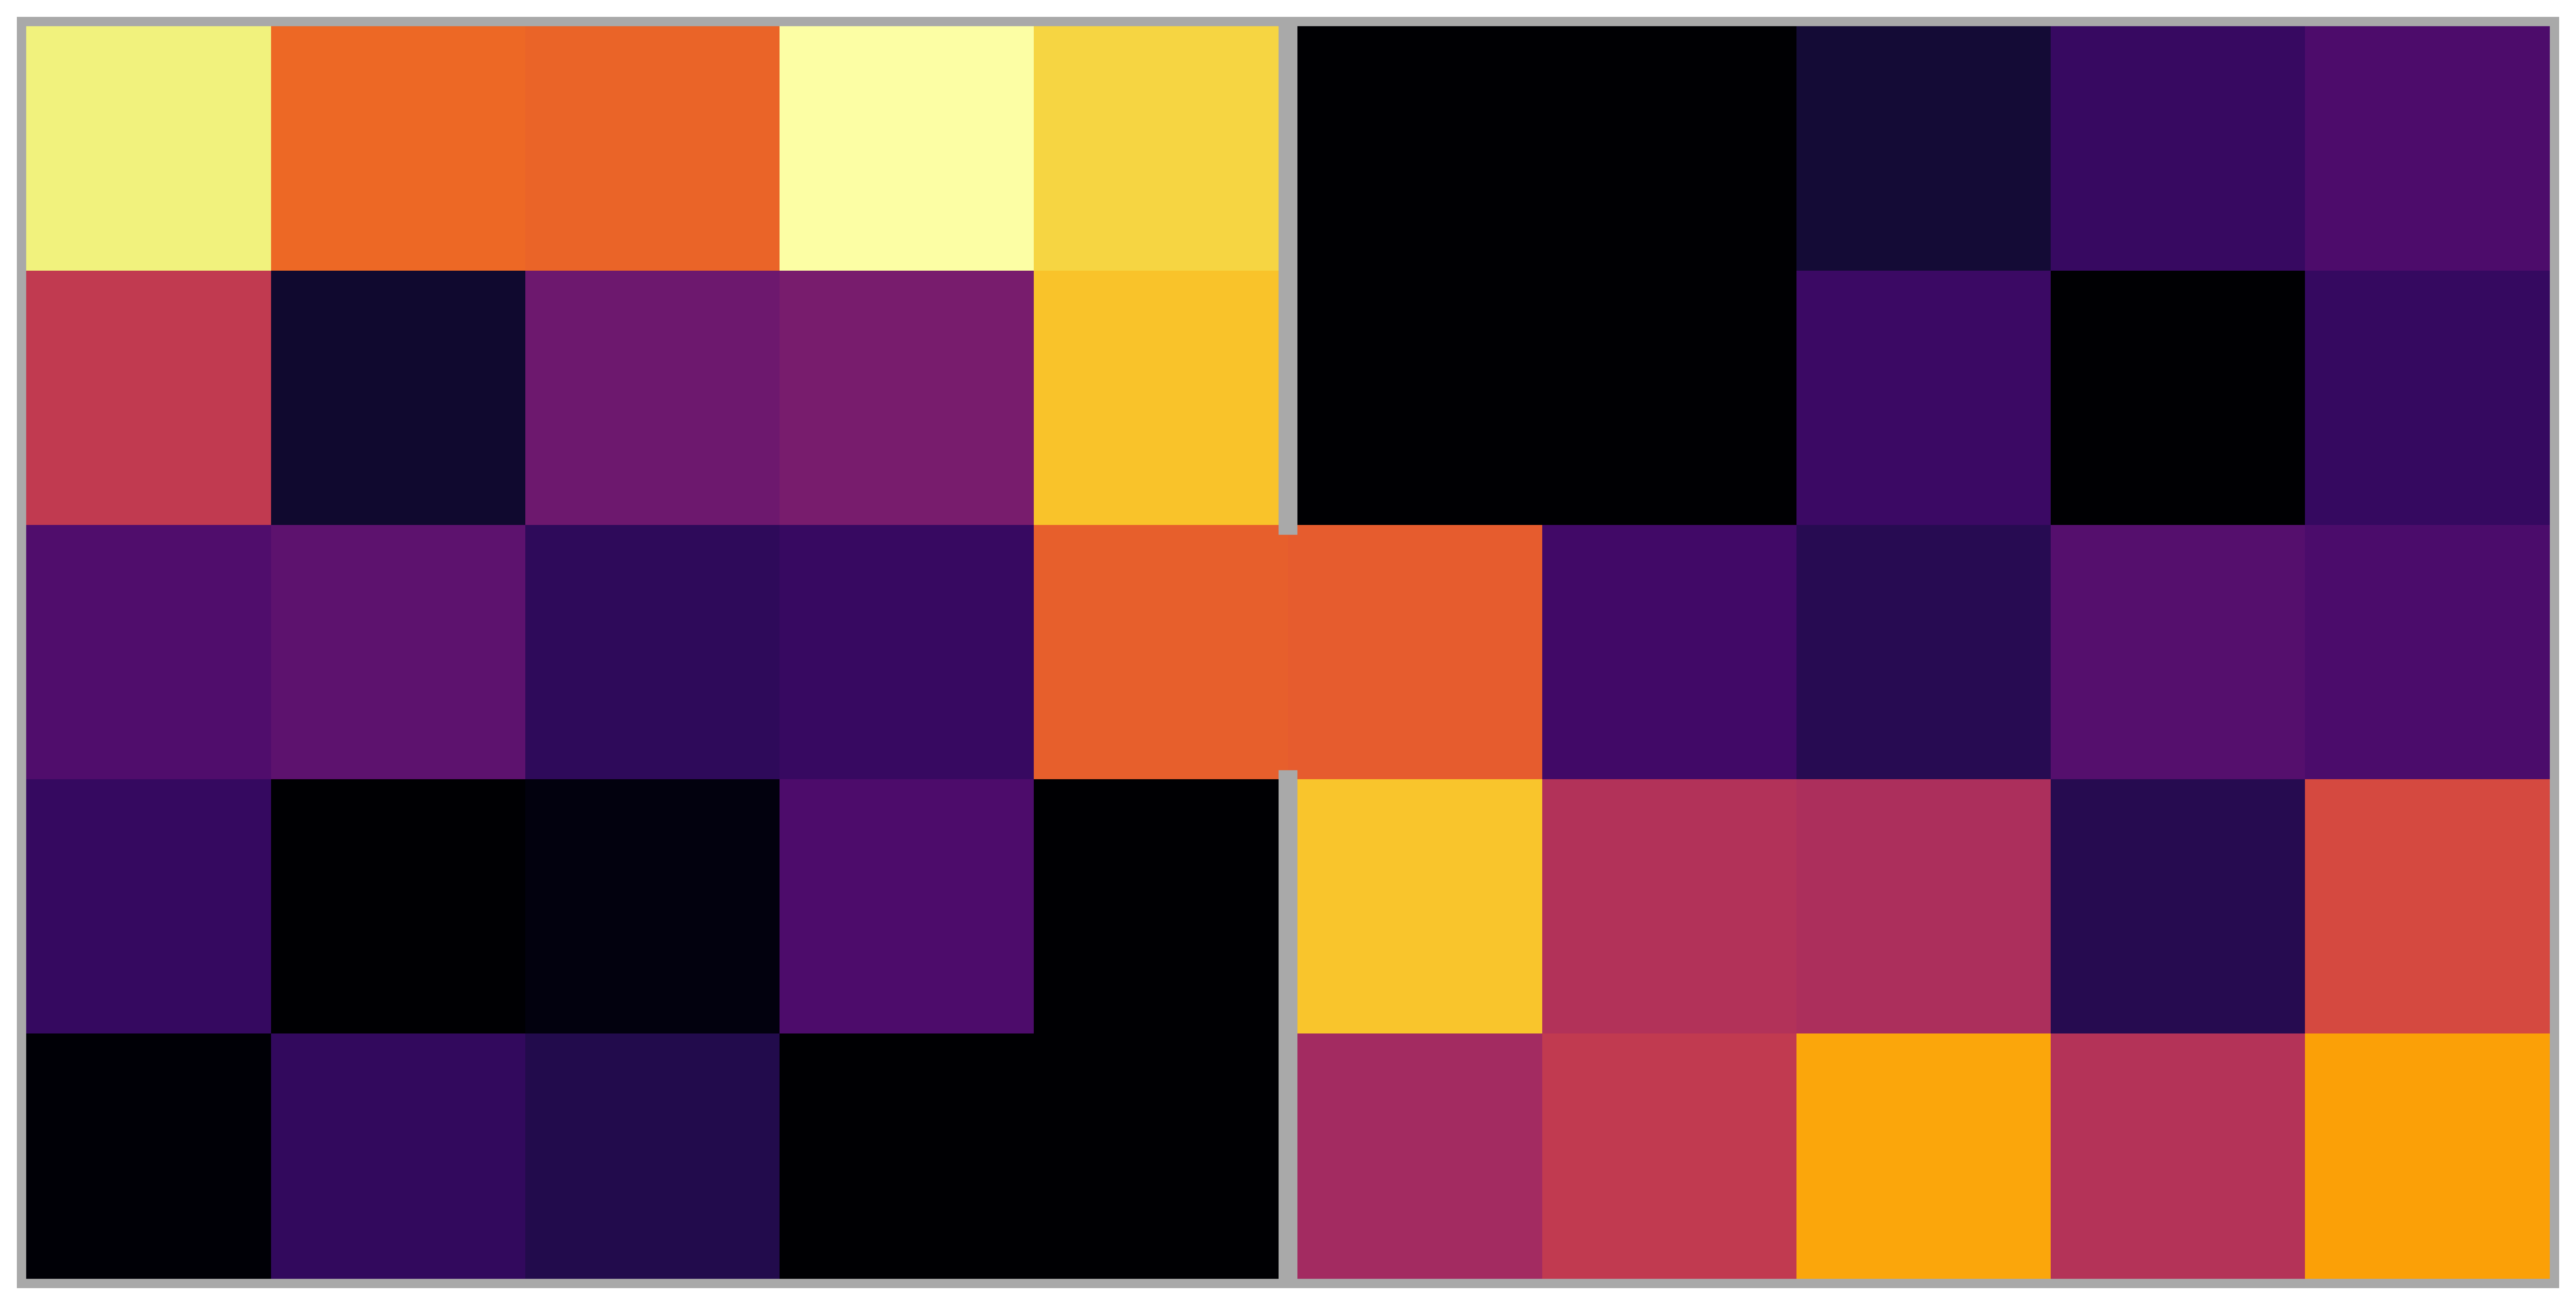

In [54]:
# agent3.runRat(trainTime=5)
plotter3 = Visualiser(agent3)
plotter3.plotTrajectory(endtime=agent3.t/60)
plotter3.plotHeatMap()

In [26]:
#FIGURE 2L
fig, ax = plotter3.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2L.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter3.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2M.svg')


TypeError: plotM() got an unexpected keyword argument 'STDP'

In [186]:
import time 

overwrite = True

if overwrite == True:
    for i in range(10):
        print("WARNING! Overwriting in %g s" %(10-i)) 
        time.sleep(1) 
    pickleAndSave(agent,"openLoop")
    pickleAndSave(agent2,"closedLoop")
    pickleAndSave(agent3,"twoRooms")

WARNING! Overwriting in 10 s
WARNING! Overwriting in 9 s
WARNING! Overwriting in 8 s
WARNING! Overwriting in 7 s
WARNING! Overwriting in 6 s
WARNING! Overwriting in 5 s
WARNING! Overwriting in 4 s
WARNING! Overwriting in 3 s
WARNING! Overwriting in 2 s
WARNING! Overwriting in 1 s


PicklingError: Can't pickle <class 'mazeAgentUtils.MazeAgent'>: it's not the same object as mazeAgentUtils.MazeAgent

In [ ]:
if overwrite == True:
    agent = loadAndDepickle("openLoop")
    agent2 = loadAndDepickle("closedLoop")
    agent3 = loadAndDepickle("twoRooms")

'../figures/210827/openLoopEnd_1808'

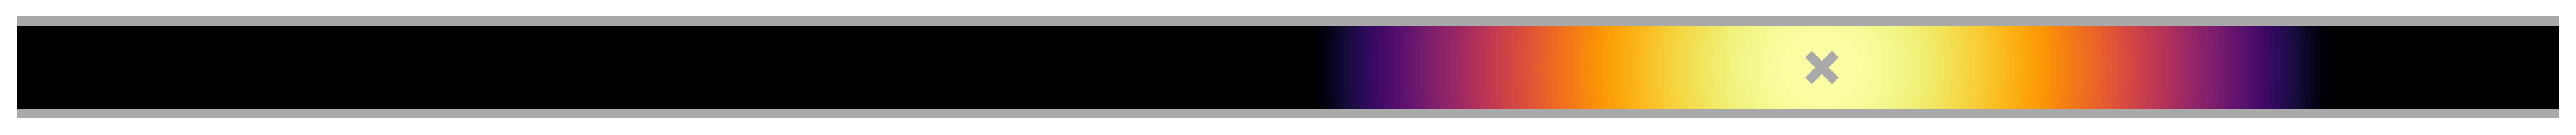

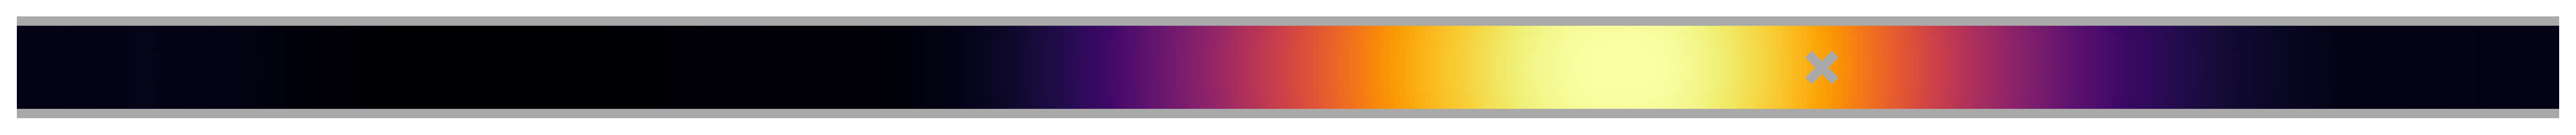

In [184]:
#FIGURE 3A
plotter = Visualiser(agent)
fig, ax = plotter.plotReceptiveField(number=35)
ax.scatter(agent.centres[35][0],agent.centres[35][1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'openLoopStart',specialLocation="../figures/paperFigures/figure3/3Ai.svg")

fig, ax = plotter.plotPlaceField(time=30, number=35, STDP=True,threshold=0.0)
ax.scatter(agent.centres[35][0],agent.centres[35][1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'openLoopEnd',specialLocation="../figures/paperFigures/figure3/3Aii.svg")


'../figures/210827/closedLoopEnd_1808'

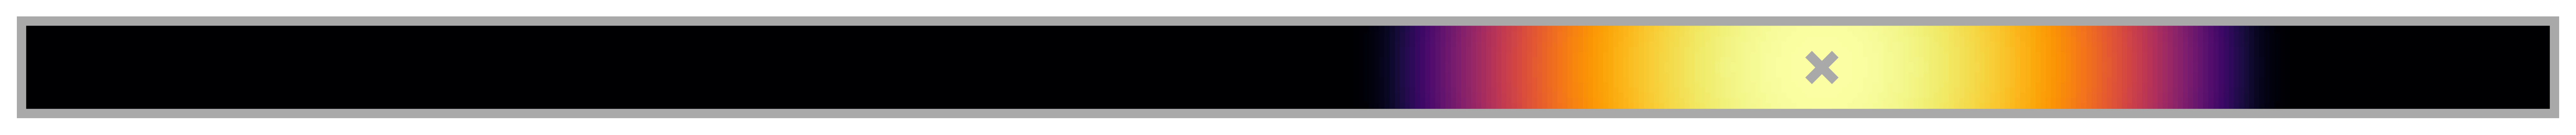

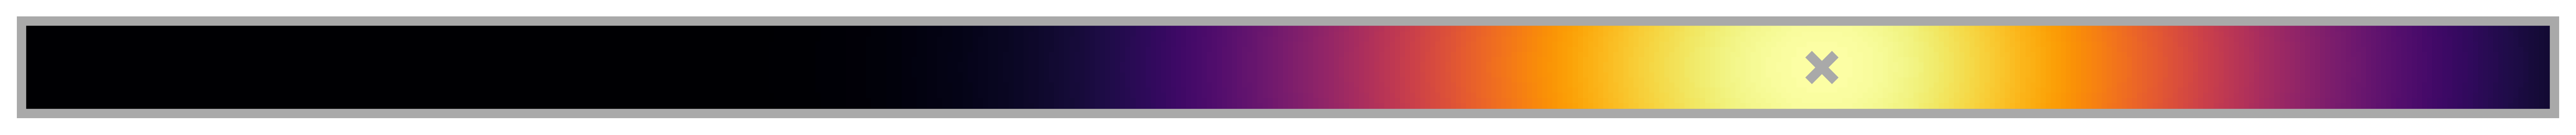

In [185]:
#FIGURE 3B
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotReceptiveField(number=35)
ax.scatter(agent2.centres[35][0],agent2.centres[35][1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'closedLoopStart',specialLocation="../figures/paperFigures/figure3/3Bi.svg")

fig, ax = plotter2.plotPlaceField(time=30, number=35, STDP=True,threshold=0.0)
ax.scatter(agent2.centres[35][0],agent2.centres[35][1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'closedLoopEnd',specialLocation="../figures/paperFigures/figure3/3Bii.svg")

'../figures/210827/2DMazeSideEnd_1755'

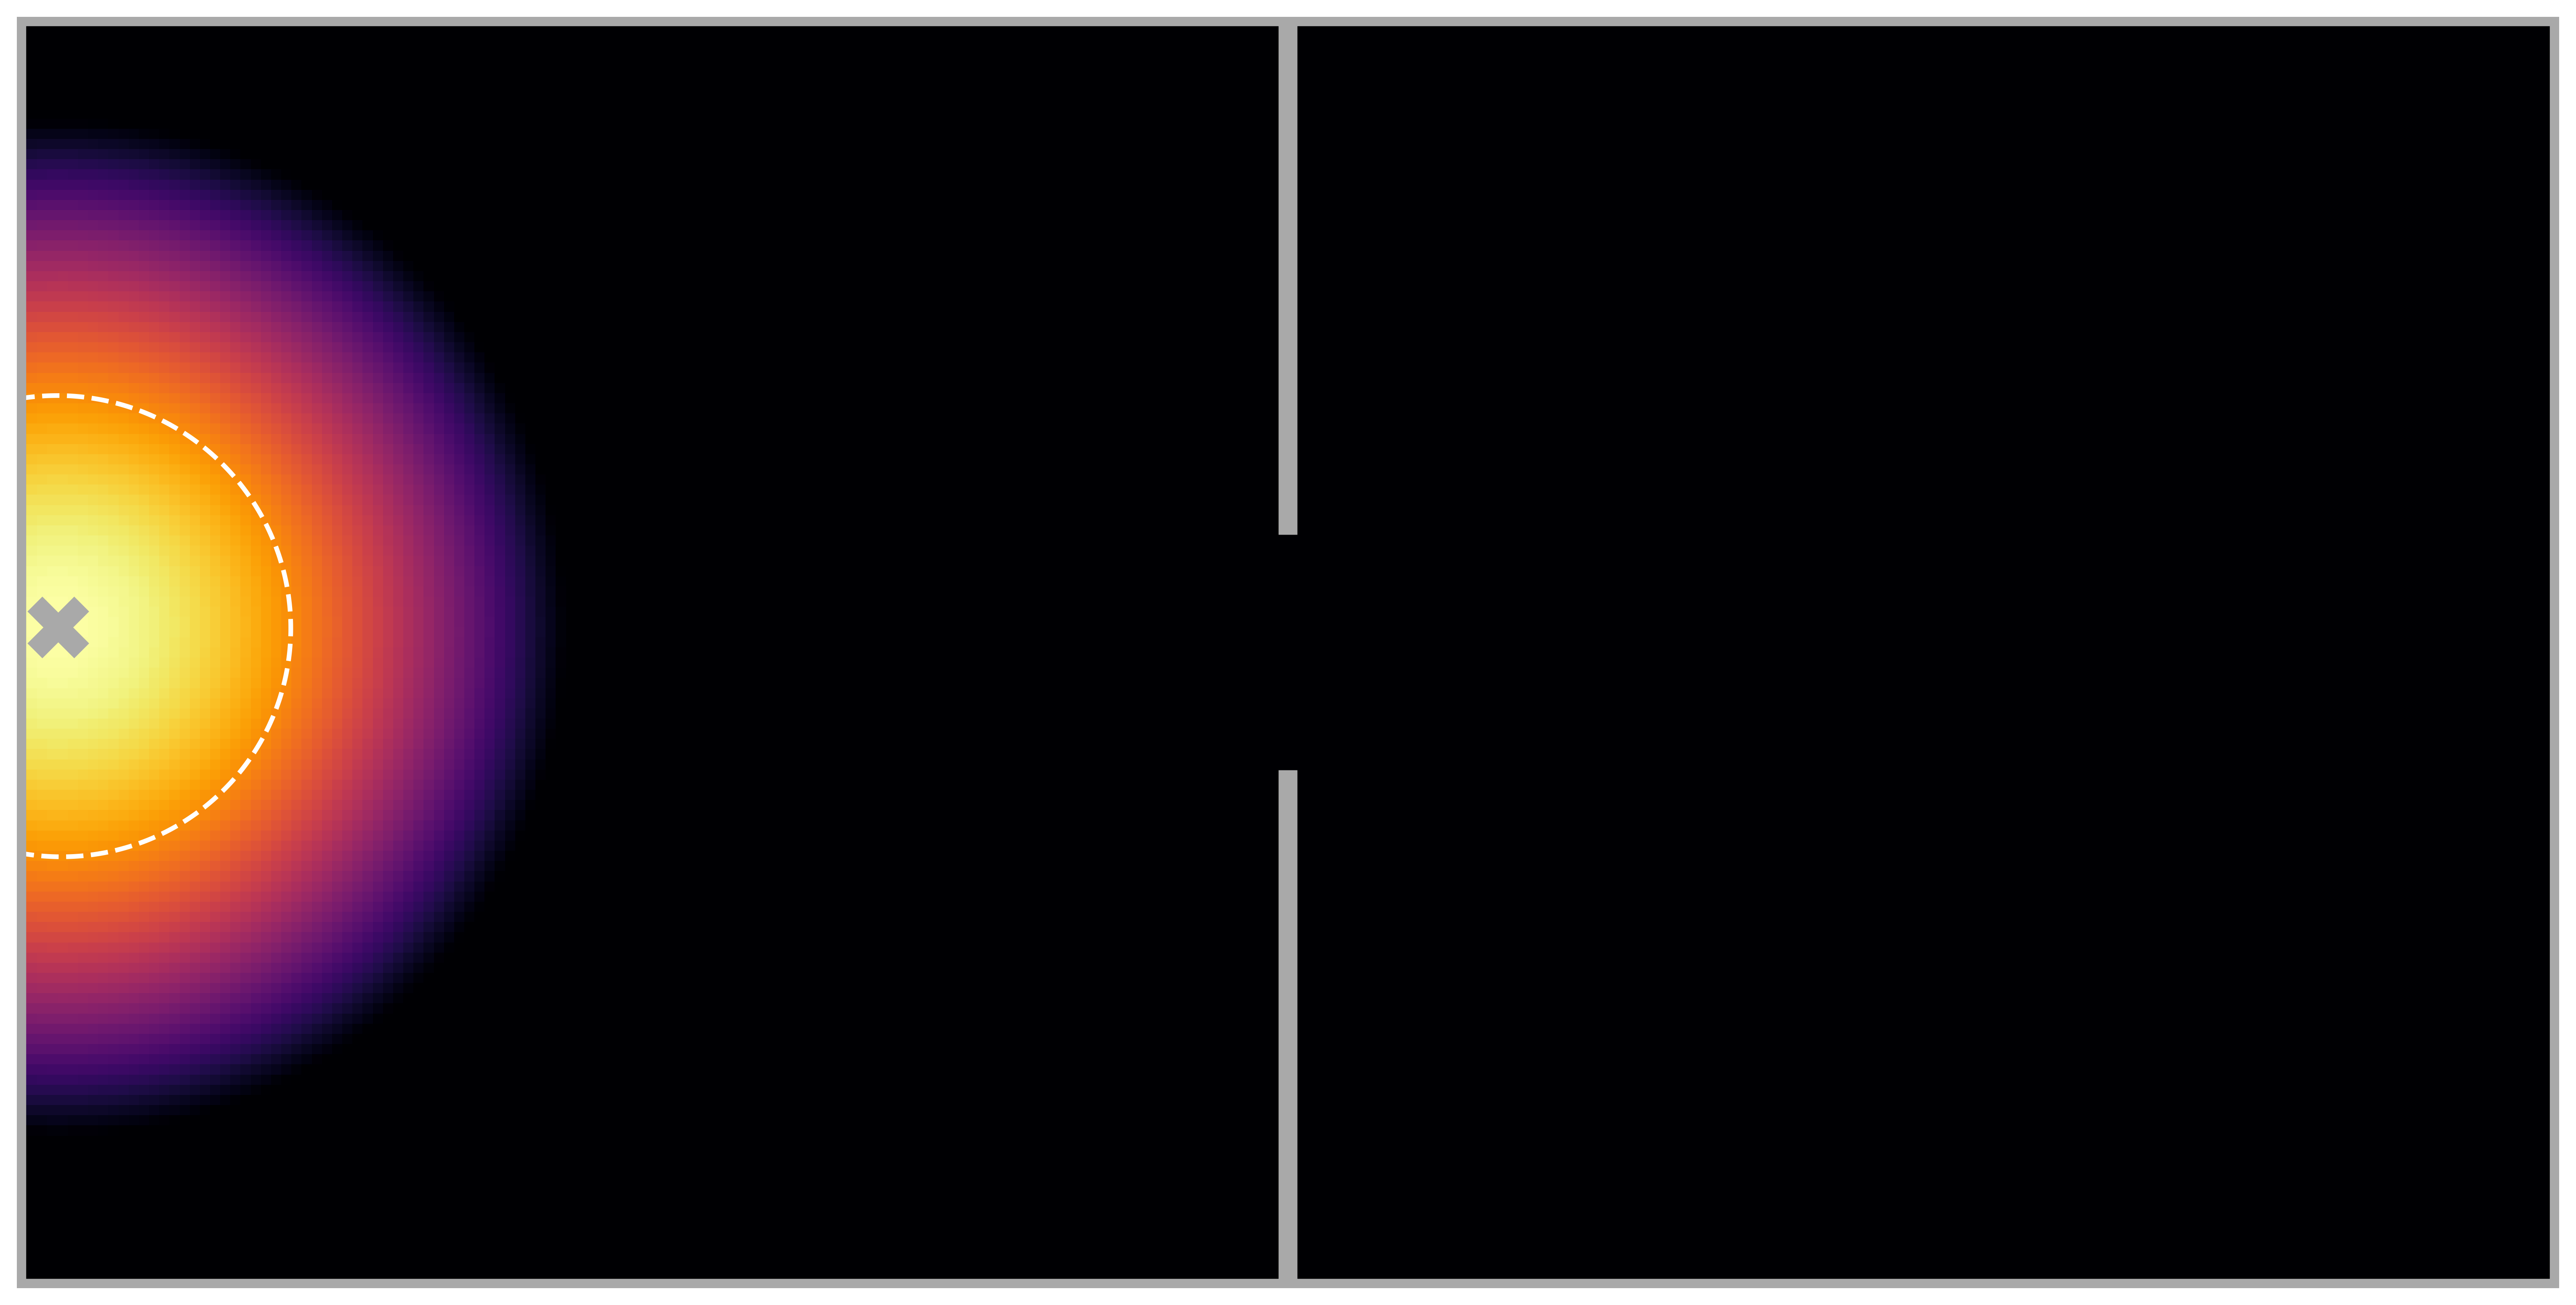

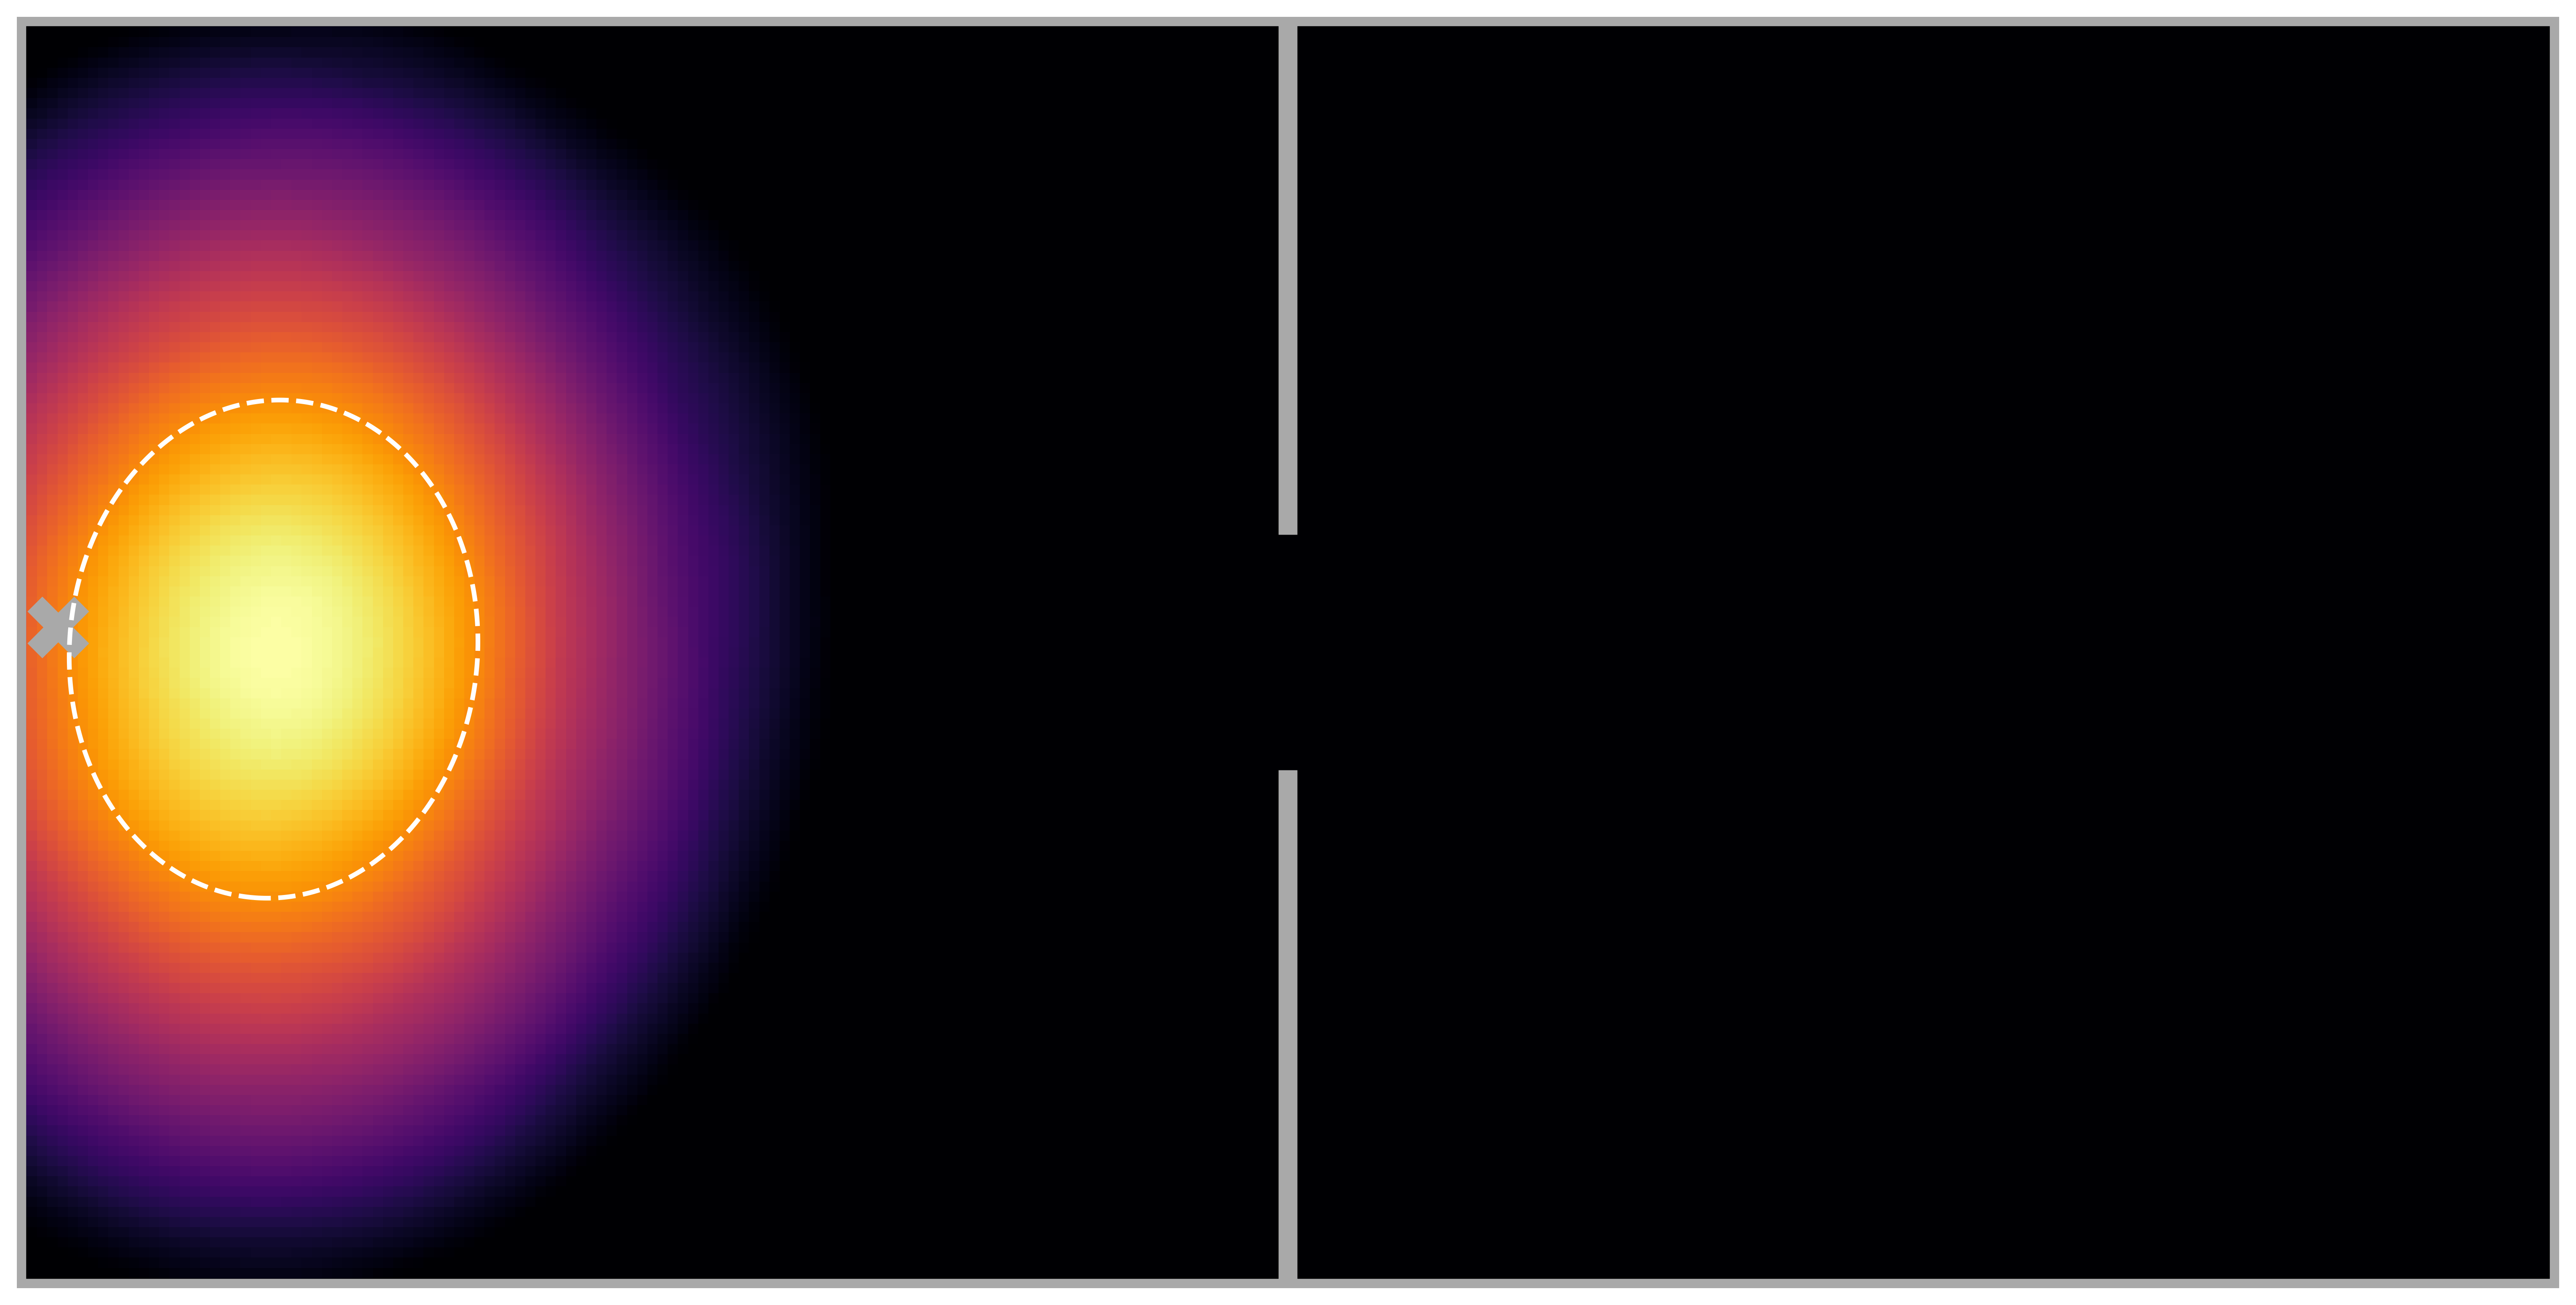

In [182]:
#FIGURE 3C
plotter3 = Visualiser(agent3)
#find cell near wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([0.15,1.2]),axis=1))
fig, ax = plotter3.plotReceptiveField(number=cellID, fitEllipse=True)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeSideStart',specialLocation="../figures/paperFigures/figure3/3Ci.svg")

fig, ax = plotter3.plotPlaceField(number=cellID, STDP=True,fitEllipse=True,threshold=0.2)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeSideEnd',specialLocation="../figures/paperFigures/figure3/3Cii.svg")

'../figures/210827/2DMazeDoorCreepEnd_1754'

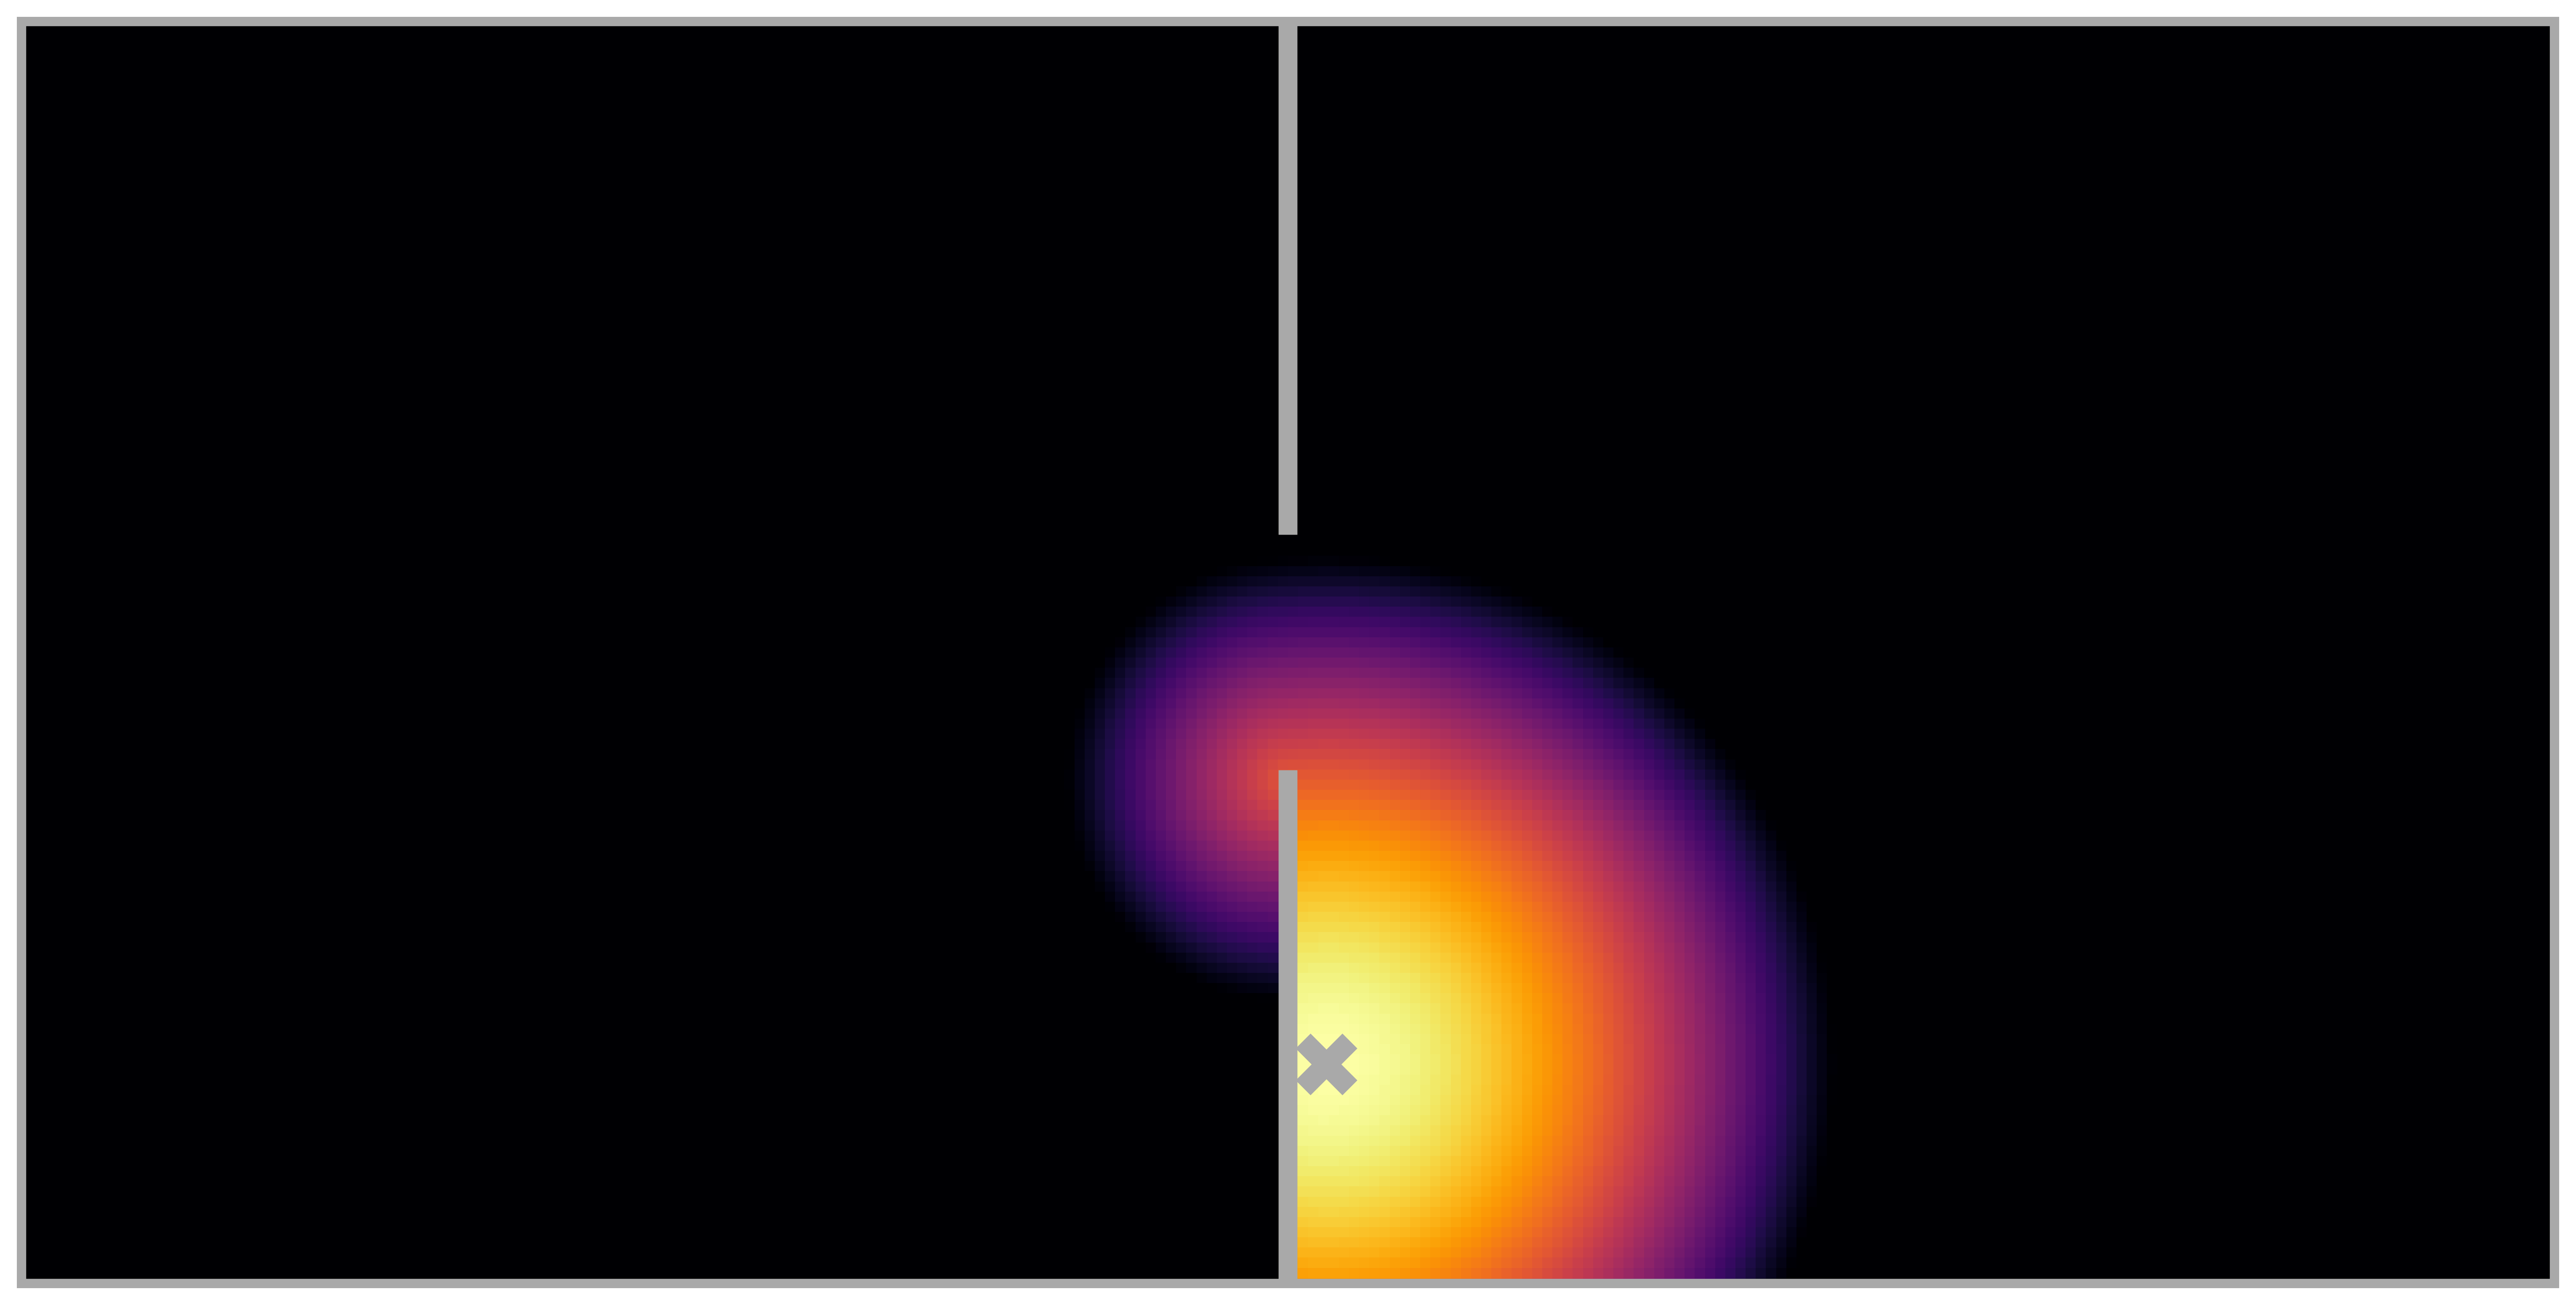

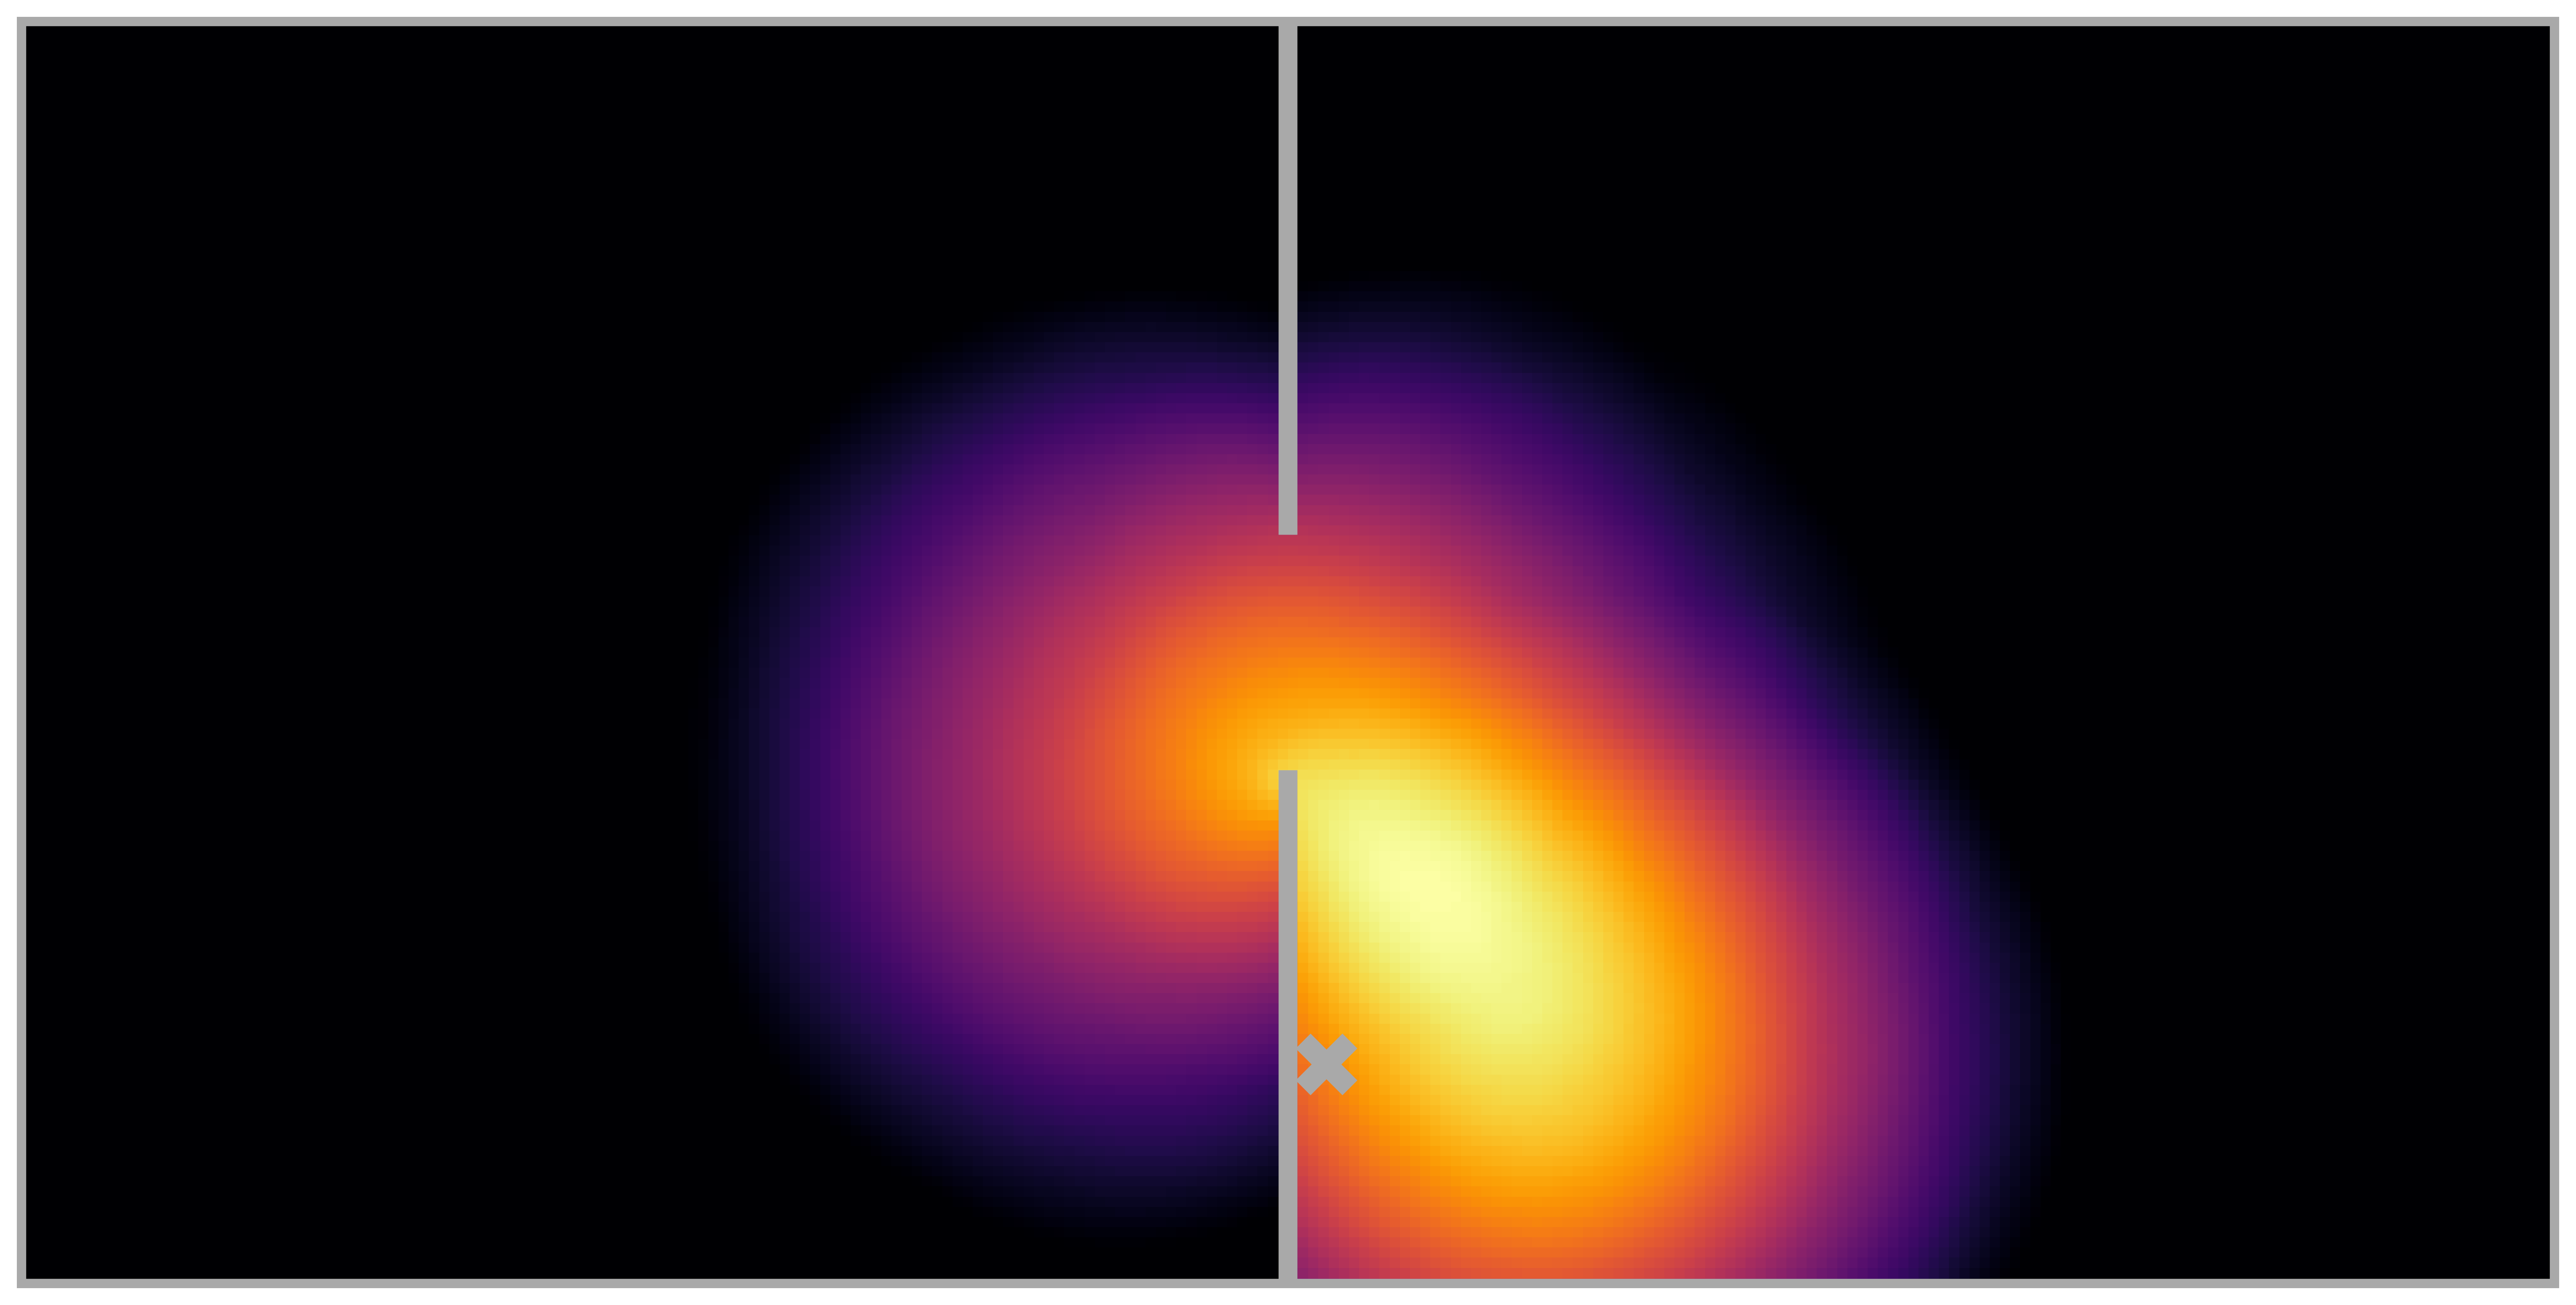

In [181]:
#FIGURE 3D
plotter3 = Visualiser(agent3)
#find cell just behind wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([2.6,0.4]),axis=1))
fig, ax = plotter3.plotReceptiveField(number=cellID)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeDoorCreepStart',specialLocation="../figures/paperFigures/figure3/3Di.svg")

fig, ax = plotter3.plotPlaceField(time=30, number=cellID, STDP=True,threshold=0.2)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeDoorCreepEnd',specialLocation="../figures/paperFigures/figure3/3Dii.svg")

In [ ]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T
centres = np.vstack((centres,centres,centres))
sigmas = np.array([0.5]*N  + [1]*N + [1.5]*N)

#Default parameters for MazeAgent 
params4 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.002,       #simulation time disretisation 
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : sigmas,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'reorderCells'        : False,
}


agent4 =  MazeAgent(params4)



Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


'../figures/210827/openloop_threetypes_1336'

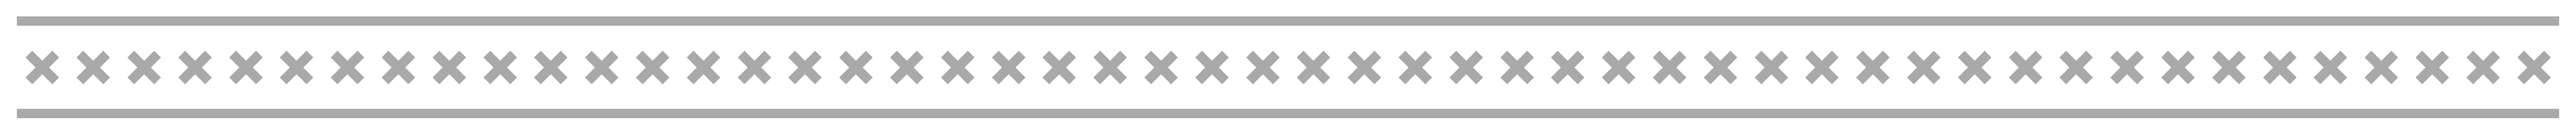

In [ ]:
#FIGURE 4A 
plotter4 = Visualiser(agent4)
fig, ax = plotter4.plotFeatureCells(centresOnly=True, textlabel=False,threetypes=False)
saveFigure(fig,'openloop_threetypes',specialLocation="../figures/paperFigures/figure4/4C.svg")

  0%|          | 0/150000 [00:00<?, ?it/s]

Calculating place and grid cells
using default threshold


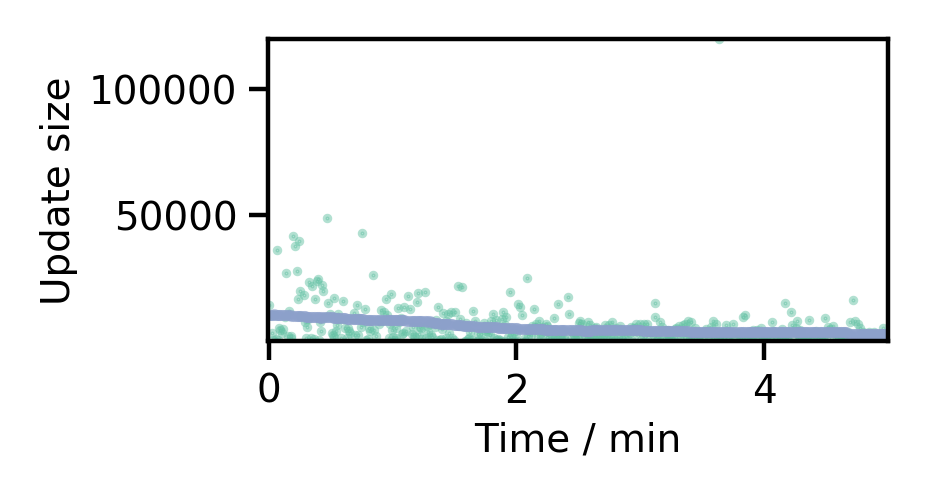

In [ ]:
agent4.runRat(trainTime=5,saveEvery=0.1)
plotter4 = Visualiser(agent4)

'../figures/210827/M_1339_2'

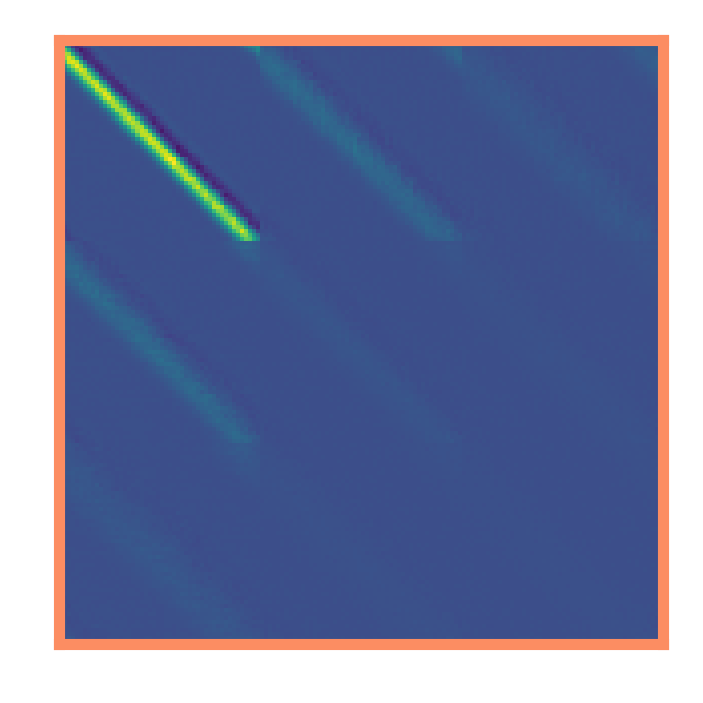

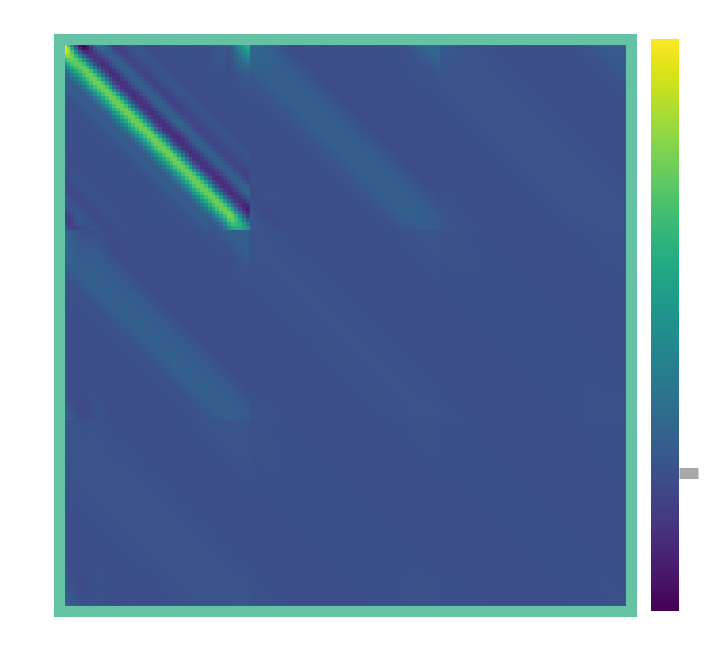

In [ ]:
#FIGURE 2L
fig, ax = plotter4.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure4/4D.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter4.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure4/4E.svg')

In [ ]:
#FIGURE 4A
N=50
loopsize=5
xcen = np.linspace(0,loopsize,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

sigmas = [0.25,0.5,0.75,1,1.25,1.5,1.75,2]
w_bank = np.zeros(shape=(len(sigmas),N,N))

for (i, sigma) in enumerate(sigmas):
    parameters = {
            #Maze params 
            'mazeType'            : 'loop',  #type of maze, define in getMaze() function
            'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
            'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
            'roomSize'            : loopsize,          #maze size scaling parameter, metres
            'dt'                  : 0.005,       #simulation time disretisation 
            'centres'             : centres,       #array of receptive field positions. Overwrites nCells
            'sigma'               : sigma,          #basis cell width scale (irrelevant for onehots)
            'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
            #TD params 
            'tau'                 : 3,          #TD decay time, seconds
            'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
            'alpha'               : 0.01,       #TD learning rate 
            'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
            #STDP params
            'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
            'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
            'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
            'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
            'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
            'eta_post'            : 0.05,        #learning rate for post to pre weakening
            'kappa'               : 1,        #von mises spread parameter (smaller = wider)
            'tau_pre'             : 20e-3,      #rate potentiating trace decays
            'tau_post'            : 20e-3,      #rate depressing trace decays 
            'baselineFiringRate'  : 0
    }

    agentsigma =  MazeAgent(parameters)
    agentsigma.runRat(trainTime=10,TDSRLearn=False)
    w_bank[i] = agentsigma.W


In [ ]:
taus = np.zeros(len(sigmas))
taus_sigma = np.zeros(len(sigmas))

for (i,sigma) in enumerate(sigmas):
    t = []
    w_shifted = np.zeros_like(agentsigma.W)
    w = w_bank[i]
    for j in range(agentsigma.nCells):
        w_shifted[j,:] = np.roll(w[j,:],-j)
    w_shifted_mean = np.mean(w_shifted,axis=0)
    b = np.argmax(w_shifted_mean)
    plt.plot(w_shifted_mean)
    max_binding = w_shifted_mean[b]
    while True: 
        if w_shifted_mean[b] <= max_binding / np.e:
            t = agentsigma.nCells - b
            break
        else: 
            b -= 1 
    tau =  t * (agentsigma.roomSize / agentsigma.nCells) / (agentsigma.speedScale)
    taus[i] = tau

taus_plot = taus
taus_sigma_plot = taus_sigma
sigmas_plot = sigmas



fig, ax = plt.subplots(figsize=(2,2))
[m,c] = np.polyfit(sigmas_plot,taus_plot,deg=1)
x = np.linspace(0,sigmas_plot[-1],100)
y = m*x + c
color = ['darkgrey'] * len(sigmas)
color[1],color[3],color[5] = 'C2','#B696C7','C3'
size = [25] * len(sigmas)
ax.scatter(sigmas_plot,taus_plot,s=size,c=color)
# ax.errorbar(sigmas_plot,taus_plot,taus_sigma_plot,ls="none",c=color)
ax.plot(x,y,c='darkgrey',linestyle='--',linewidth=1)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0,right=sigmas_plot[-1]+0.1)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('darkgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('none')        
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('none')
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels(['','','','',''])
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['','','','',''])
ax.tick_params(width=2,color='darkgrey')

saveFigure(fig,"tausigma",specialLocation="../figures/paperFigures/figure4/4A.svg")


In [51]:
from jax import vmap

def getSpikes(fr):
    n_spikes = np.random.poisson(fr[0])
    spikes = np.random.uniform(0,1,n_spikes)
    return spikes

vmap_getSpikes = vmap(getSpikes)

In [52]:
firingRates = np.random.uniform(0,5,100)

In [54]:
#naive
spikes = np.array([])
for i in range(len(firingRates)):
    spikes = np.append(spikes, getSpikes(np.array(firingRates[i])))

vmap(getSpikes,in_axes=0,out_axes=0)(firingRates)    

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [29]:
print(getSpikes(10))

None


In [38]:
spikes

array([0.58245357, 0.09514338, 0.99756298, 0.12180021, 0.18560029,
       0.89585874, 0.92880166, 0.76118027, 0.31601252, 0.4528385 ,
       0.21895915, 0.23423346, 0.11725403, 0.60380836, 0.04430225,
       0.59541783, 0.05016725, 0.7823077 , 0.69906453, 0.13496891,
       0.15927144, 0.74987374, 0.00790903, 0.89043687, 0.26436885,
       0.62618244, 0.32031553, 0.86539471, 0.95166426, 0.55981865,
       0.28689098, 0.35853762, 0.77285889, 0.05211495, 0.632512  ,
       0.9181613 , 0.46565733, 0.3090206 , 0.57442199, 0.21979569,
       0.18966922, 0.39192535, 0.39648024, 0.87628893, 0.51553069,
       0.61328258, 0.47182504, 0.17597084, 0.16916242, 0.23978404,
       0.94498796, 0.11325516, 0.31365283, 0.35792434, 0.37991039,
       0.4284503 , 0.12617204, 0.72899183, 0.73149034, 0.50643936,
       0.92077689, 0.88045148, 0.53176358, 0.68489841, 0.57017586,
       0.31271598, 0.52647048, 0.6292905 , 0.74658273, 0.61788897,
       0.2080694 , 0.40679668, 0.4233662 , 0.01679637, 0.77750